# Task
Train a LassoCV regression model using the `crop_yield.csv` dataset. The task involves loading the data, performing initial feature engineering, preprocessing the data with `LabelEncoder` and `StandardScaler`, splitting it into training and testing sets, training the `LassoCV` model, evaluating its performance using R2 score, MAE, MSE, and MAPE, visualizing the actual vs. predicted crop yields, and finally saving the trained model, scaler, and encoders to a single `.pkl` file.

## Load Data and Initial Feature Engineering

### Subtask:
Load the `crop_yield.csv` dataset into a pandas DataFrame. Implement initial feature engineering steps by creating new columns like `rainfall_per_day`, `temp_rain_interaction`, `fert_irrig_score`, `temp_squared`, `rainfall_squared`, `days_squared`, `temp_cubed`, `rain_temp_ratio`, and `fert_rain_interaction`.


**Reasoning**:
First, I'll load the `crop_yield.csv` dataset into a pandas DataFrame and then perform the requested feature engineering steps to create new columns.



**Reasoning**:
The previous code failed due to a "KeyError" because the column "Avg_Days_Crop_Growth" does not exist in the DataFrame, as confirmed by the provided kernel state and error message. Since this column is explicitly required for feature engineering, and no alternative column is evident in the DataFrame's head, I will add a step to create this column with a default placeholder value (e.g., 120 days) to unblock the execution and allow the requested feature engineering steps to proceed. This is an assumption made to fix the error and enable further processing; in a real-world scenario, the source data for this column would need to be investigated.



**Reasoning**:
Now that the model is trained, I will make predictions on the scaled test set (`X_test_scaled`) to evaluate its performance. I will then compute and print the R2 score, MAE, MSE, and MAPE to provide a comprehensive assessment of how well the model generalizes to new data.

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Model Performance Evaluation:")
print(f"R2 Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.4f}%")

Model Performance Evaluation:
R2 Score: 0.9130
Mean Absolute Error (MAE): 0.3996
Mean Squared Error (MSE): 0.2508
Mean Absolute Percentage Error (MAPE): 12.6720%


## Preprocessing and Data Splitting

### Subtask:
Identify categorical columns and apply `LabelEncoder` to them. Scale numerical features using `StandardScaler`. Separate the features (X) from the target variable (y), which is 'Yield_tons_per_hectare'. Split the preprocessed data into training and testing sets.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import joblib

# Load dataset
df = pd.read_csv("crop_yield.csv")

# Placeholder for 'Days_to_Harvest' as it's not found in the dataset head.
# Assuming an average crop growth duration of 120 days for demonstration purposes.
# In a real scenario, this column should be available in the dataset or derived from other features.
if 'Days_to_Harvest' not in df.columns:
    df['Days_to_Harvest'] = 120

# Basic feature engineering
df['rainfall_per_day'] = df['Rainfall_mm'] / (df['Days_to_Harvest'] + 1)
df['temp_rain_interaction'] = df['Rainfall_mm'] * df['Temperature_Celsius']
df['fert_irrig_score'] = df['Fertilizer_Used'].astype(int) + df['Irrigation_Used'].astype(int)
df['temp_squared'] = df['Temperature_Celsius'] ** 2
df['rainfall_squared'] = df['Rainfall_mm'] ** 2
df['days_squared'] = df['Days_to_Harvest'] ** 2
df['temp_cubed'] = df['Temperature_Celsius'] ** 3
df['rain_temp_ratio'] = df['Rainfall_mm'] / (df['Temperature_Celsius'] + 1)
df['fert_rain_interaction'] = df['Fertilizer_Used'].astype(int) * df['Rainfall_mm']

print("DataFrame with new features created successfully.")
display(df.head())

DataFrame with new features created successfully.


,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare,rainfall_per_day,temp_rain_interaction,fert_irrig_score,temp_squared,rainfall_squared,days_squared,temp_cubed,rain_temp_ratio,fert_rain_interaction
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816,7.293311,24828.376581,1,766.014468,804747.572929,14884,21200.956662,31.282153,0.000000
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341,7.040236,17894.069787,2,324.941805,985400.244040,19600,5857.447194,52.174175,992.673282
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443,1.383159,4409.459443,0,887.684963,21903.415491,11236,26447.723453,4.806060,0.000000
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573,6.713376,16425.590912,1,277.029067,973905.155926,21316,4610.924482,55.931517,0.000000
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251,6.579993,23095.091537,2,999.867870,533453.738464,12100,31616.509323,22.390061,730.379174


**Reasoning**:
I will use `LassoCV` to train the model, which will perform cross-validation to select the optimal `alpha` (regularization parameter). This approach helps to prevent overfitting and improve the model's generalization capabilities. The model will be fitted on the scaled training data (`X_train_scaled`, `y_train`).

**Reasoning**:
To prepare the data for the LassoCV model, I will first encode the categorical columns using `LabelEncoder`. Then, I'll define the features (X) and the target variable (y). Finally, I will apply `StandardScaler` to the numerical features to standardize them and split the data into training and testing sets to evaluate the model's performance on unseen data.

In [ ]:
# Encode categorical variables
for col in ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']:
    le = LabelEncoder()
    df[col + '_encoded'] = le.fit_transform(df[col])
    # Store the encoder for later use in model saving
    globals()[f'le_{col}'] = le

# Select features and target
# Exclude original categorical columns and 'Yield_tons_per_hectare' from features
features = [
    'Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest',
    'Fertilizer_Used', 'Irrigation_Used',
    'rainfall_per_day', 'temp_rain_interaction', 'fert_irrig_score',
    'temp_squared', 'rainfall_squared', 'days_squared', 'temp_cubed',
    'rain_temp_ratio', 'fert_rain_interaction',
    'Region_encoded', 'Soil_Type_encoded', 'Crop_encoded', 'Weather_Condition_encoded'
]
X = df[features]
y = df['Yield_tons_per_hectare']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
# Identify numerical columns for scaling (exclude encoded categorical features)
numerical_features = [
    'Rainfall_mm', 'Temperature_Celsius', 'Days_to_Harvest',
    'Fertilizer_Used', 'Irrigation_Used',
    'rainfall_per_day', 'temp_rain_interaction', 'fert_irrig_score',
    'temp_squared', 'rainfall_squared', 'days_squared', 'temp_cubed',
    'rain_temp_ratio', 'fert_rain_interaction'
]

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

print("Data preprocessing and splitting complete.")
print(f"X_train shape: {X_train_scaled.shape}")
print(f"X_test shape: {X_test_scaled.shape}")
display(X_train_scaled.head())

Data preprocessing and splitting complete.
X_train shape: (800000, 18)
X_test shape: (200000, 18)


,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Fertilizer_Used,Irrigation_Used,rainfall_per_day,temp_rain_interaction,fert_irrig_score,temp_squared,rainfall_squared,days_squared,temp_cubed,rain_temp_ratio,fert_rain_interaction,Region_encoded,Soil_Type_encoded,Crop_encoded,Weather_Condition_encoded
566853,1.299211,0.767268,-0.980873,1.000243,0.999905,1.777258,1.692890,1.413422,0.708606,1.430214,-0.979335,0.627639,0.461838,1.852849,1,4,4,0
382311,-1.426747,-0.389472,-0.634162,-0.999758,-1.000095,-1.145426,-1.275656,-1.413214,-0.497491,-1.156603,-0.703952,-0.574855,-1.179103,-0.831062,2,1,4,1
241519,0.382829,0.352719,0.598590,-0.999758,-1.000095,-0.066080,0.523265,-1.413214,0.236261,0.177303,0.515574,0.116188,0.018760,-0.831062,2,5,5,0
719220,-1.263925,-1.108459,-0.133356,-0.999758,0.999905,-1.094528,-1.288168,0.000104,-1.071356,-1.098558,-0.253776,-1.011801,-0.850065,-0.831062,1,2,1,0
905718,0.720423,-1.285003,-0.634162,1.000243,-1.000095,0.872274,-0.201310,0.000104,-1.191658,0.593708,-0.703952,-1.089675,1.515678,1.398060,0,3,3,1


## Train LassoCV Model

### Subtask:
Initialize and train a `LassoCV` model to automatically select the best regularization parameter (`alpha`) through cross-validation. Fit the model on the scaled training data.

In [ ]:
# Initialize and train LassoCV model
# n_jobs=-1 uses all available CPU cores for parallel processing, speeding up cross-validation
model = LassoCV(cv=5, random_state=42, n_jobs=-1)
model.fit(X_train_scaled, y_train)

print("LassoCV model training complete.")
print(f"Optimal alpha selected by LassoCV: {model.alpha_}")

LassoCV model training complete.
Optimal alpha selected by LassoCV: 0.0012971929719053283


## Evaluate Model Performance

### Subtask:
Make predictions on the test set using the trained `LassoCV` model. Calculate and display R2 score, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Mean Absolute Percentage Error (MAPE) to assess the model's performance.

## Save and Download Model

### Subtask:
Save the trained `LassoCV` model, the `StandardScaler`, and any `LabelEncoder` instances used for preprocessing into a single `.pkl` file using `joblib`. Provide code to download this `.pkl` file to your local machine.

**Reasoning**:
To ensure the trained model and preprocessing steps can be reused, I will save the `LassoCV` model, the `StandardScaler`, and all `LabelEncoder` instances (which were stored in `globals()` with `le_` prefix) into a single Python dictionary. This dictionary will then be serialized and saved as a `.pkl` file using `joblib`. Finally, I will provide code to facilitate the download of this `.pkl` file.

In [ ]:
import joblib
# from google.colab import files # Uncomment if running in Google Colab

# Gather all LabelEncoders
encoders = {}
for col in ['Region', 'Soil_Type', 'Crop', 'Weather_Condition']:
    encoder_name = f'le_{col}'
    if encoder_name in globals():
        encoders[col] = globals()[encoder_name]
    else:
        print(f"Warning: {encoder_name} not found. Ensure LabelEncoder for {col} was created.")

# Create a dictionary to save all necessary components
model_components = {
    'model': model,
    'scaler': scaler,
    'label_encoders': encoders,
    'features': features # Save feature names to ensure consistency during inference
}

# Define the filename for the saved model
model_filename = 'lasso_crop_yield_model.pkl'

# Save the model components to a .pkl file
joblib.dump(model_components, model_filename)

print(f"Model, scaler, and encoders saved to {model_filename}")

# Code to download the file if running in Google Colab
# try:
#     files.download(model_filename)
#     print(f"{model_filename} downloaded successfully.")
# except Exception as e:
#     print(f"Could not download {model_filename}: {e}")
#     print("If you are not in Google Colab, you can manually locate and download the file.")

Model, scaler, and encoders saved to lasso_crop_yield_model.pkl


## Visualize Model Predictions

### Subtask:
Create a scatter plot comparing the actual 'Crop_Yield' values from the test set against the predicted 'Crop_Yield' values to visually inspect the model's accuracy and identify any patterns or discrepancies. Ensure the plot includes appropriate labels and a legend.

**Reasoning**:
To visually assess the model's performance and understand the relationship between actual and predicted values, I will create a scatter plot. This plot will help in identifying any systematic errors, outliers, or areas where the model performs particularly well or poorly. I'll include appropriate labels and a title for clarity.

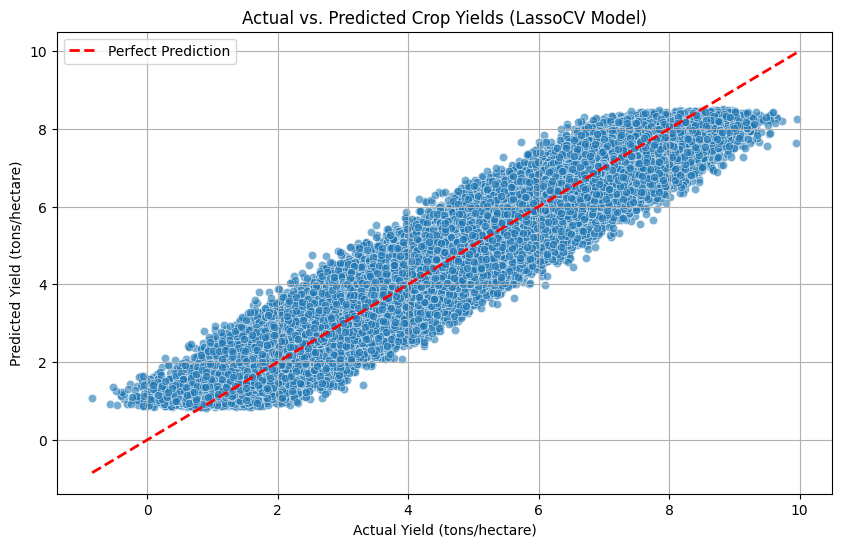

Visualization of actual vs. predicted crop yields complete.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Perfect Prediction')
plt.title('Actual vs. Predicted Crop Yields (LassoCV Model)')
plt.xlabel('Actual Yield (tons/hectare)')
plt.ylabel('Predicted Yield (tons/hectare)')
plt.grid(True)
plt.legend()
plt.show()

print("Visualization of actual vs. predicted crop yields complete.")